In [9]:
import numpy as np
import pandas as pd
import sqlite3
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Read in the data from the database
conn = sqlite3.connect('data/tables.db')
# show database content
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
# Extract two tables from it and store them in two pd df
ds = pd.read_sql_query("SELECT * from df_2023_h1_feature", conn)
target = pd.read_sql_query("SELECT * from df_2023_h1_target", conn)

[('df_2023_h1_feature',), ('df_2023_h1_target',)]


In [3]:
# custom train test val split

X_train = ds[0:10000]
y_train = target[0:10000]
X_val = ds[10001:11001]
y_val = target[10001:11001]
X_test = ds[11002: 12002]
y_test = target[11002: 12002]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(10000, 22) (10000, 1) (1000, 22) (1000, 1) (1000, 22) (1000, 1)


In [4]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = reg.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_pred))
print(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))

0.9975693924129306
5.297054701719358


In [8]:
# try test data that is further away
X_test = ds[100000:101000]
y_test = target[100000:101000]
y_pred = reg.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_pred))
print(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))

0.15717929978727108
13998.975034266332


In [22]:
r2_list = []
mse_list = []
X_list = []
for i in range(10):
    X_test = ds.iloc[10000 + i * 10000:11000 + i * 10000]
    y_test = target.iloc[10000 + i * 10000:11000 + i * 10000]
    y_pred = reg.predict(X_test)
    X_list.append(10000 + i * 10000)
    r2_list.append(metrics.r2_score(y_true=y_test, y_pred=y_pred))
    mse_list.append(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))

Text(0.5, 1.0, 'R2 Score for baseline model')

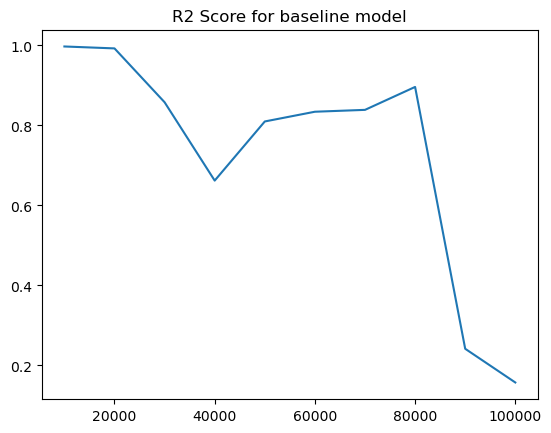

In [28]:
plt.plot(X_list, r2_list)
plt.title('R2 Score for baseline model')

Text(0.5, 1.0, 'MSE Loss for baseline model')

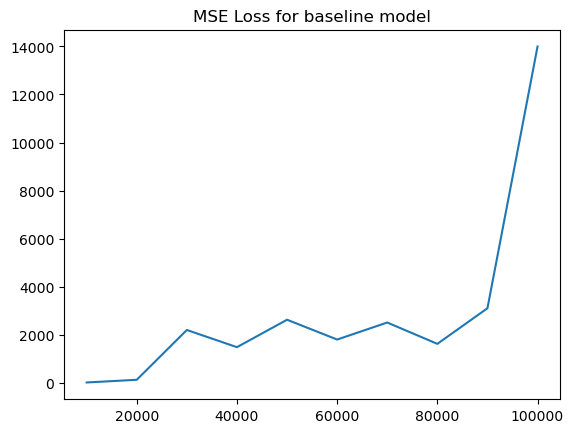

In [29]:
plt.plot(X_list, mse_list)
plt.title('MSE Loss for baseline model')

Definitely looks worse than short terms. 